# Handling FITS files

This notebook is a modified version of code from [python4astronomers](https://python4astronomers.github.io/astropy/fits.html) 

© Copyright 2011-2015, Smithsonian Astrophysical Observatory under terms of [CC Attribution 3.0](http://creativecommons.org/licenses/by/3.0/).

With minimal changes to run it in a notebook.

In [4]:
import os

if not os.path.exists('gll_iem_v02_P6_V11_DIFFUSE.fit'):
    !wget http://fermi.gsfc.nasa.gov/ssc/data/analysis/software/aux/gll_iem_v02_P6_V11_DIFFUSE.fit

In [5]:
from astropy.io import fits

hdulist = fits.open('gll_iem_v02_P6_V11_DIFFUSE.fit')
hdulist.info()

In [8]:
hdu = hdulist[0]

In [9]:
hdu.data.shape

(30, 360, 720)

In [10]:
hdu.header

SIMPLE  =                    T / Written by IDL:  Thu Jan 20 07:19:05 2011      
BITPIX  =                  -32 /                                                
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  720 / length of data axis 1                          
NAXIS2  =                  360 / length of data axis 2                          
NAXIS3  =                   30 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
FLUX    =        8.42259635886 /                                                
CRVAL1  =                   0. / Value of longitude in pixel CRPIX1             
CDELT1  =                  0.5 / Step size in longitude                         
CRPIX1  =                360

In [11]:
hdu.header['TELESCOP']

'GLAST'

In [12]:
hdu.header['INSTRUME']

'LAT'

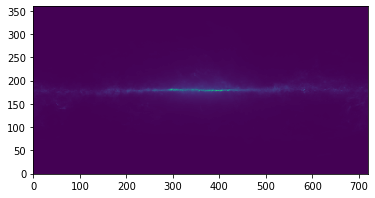

In [14]:
import matplotlib.pyplot as plt

plt.imshow(hdu.data[0,:,:], origin='lower')

In [15]:
hdu.header['TELESCOP'] = "Fermi Gamma-ray Space Telescope"

In [16]:
hdu.header['MODIFIED'] = '26 Feb 2013'  # adds a new keyword

In [17]:
hdu.data = hdu.data[0,:,:]

In [18]:
hdu.header.remove('CRPIX3')
hdu.header.remove('CRVAL3')
hdu.header.remove('CDELT3')
hdu.header.remove('CUNIT3')
hdu.header.remove('CTYPE3')

In [19]:
hdu.writeto('lat_background_model_slice.fits')

In [20]:
hdu = fits.PrimaryHDU()

In [21]:
import numpy as np

hdu.data = np.random.random((128,128))

In [22]:
hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  128                                                  
NAXIS2  =                  128                                                  
EXTEND  =                    T                                                  

In [23]:
hdu.header['telescop'] = 'Python Observatory'

In [24]:
hdu.writeto('random_array.fits')

Exercise: 

>Read in the LAT Point Source Catalog and make a scatter plot of the Galactic Coordinates of the sources (complete with axis labels). Bonus points if you can make the plot go between -180 and 180 instead of 0 and 360 degrees. Note that the Point Source Catalog contains the Galactic Coordinates, so no need to convert them.



In [26]:
import os

if not os.path.exists('gll_psc_v09.fit'):
    !wget https://fermi.gsfc.nasa.gov/ssc/data/access/lat/2yr_catalog/gll_psc_v09.fit

--2020-05-18 11:49:27--  https://fermi.gsfc.nasa.gov/ssc/data/access/lat/2yr_catalog/gll_psc_v09.fit
Resolving fermi.gsfc.nasa.gov (fermi.gsfc.nasa.gov)... 129.164.179.26, 2001:4d0:2310:150::26
Connecting to fermi.gsfc.nasa.gov (fermi.gsfc.nasa.gov)|129.164.179.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1460160 (1.4M) [application/fits]
Saving to: ‘gll_psc_v09.fit’

gll_psc_v09.fit     100%[===================>]   1.39M  1.96MB/s    in 0.7s    

2020-05-18 11:49:28 (1.96 MB/s) - ‘gll_psc_v09.fit’ saved [1460160/1460160]



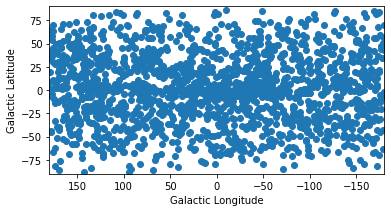

In [28]:
from astropy.io import fits
from astropy.table import Table
from matplotlib import pyplot as plt

# Read in Point Source Catalog
data = fits.getdata('gll_psc_v09.fit',1)
psc = Table(data)

# Extract Galactic Coordinates
l = psc['GLON']
b = psc['GLAT']

# Coordinates from 0 to 360, wrap to -180 to 180 to match image
l[l > 180.] -= 360.

# Plot the image
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.scatter(l, b)
ax.set_xlim(180., -180.)
ax.set_ylim(-90., 90.)
ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Galactic Latitude')
fig.savefig('fits_level2.png', bbox_inches='tight')

Exercise:

> Using Matplotlib, make an all-sky plot of the LAT Background Model in the Plate Carée projection showing the LAT Point Source Catalog overlaid with markers, and with the correct coordinates on the axes. You should do this using only astropy.io.fits, Numpy, and Matplotlib (no WCS or coordinate conversion library). Hint: the -CAR projection is such that the x pixel position is proportional to longitude, and the y pixel position to latitude. Bonus points for a pretty colormap.

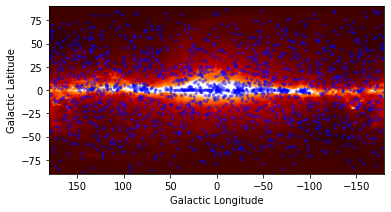

In [29]:
# this continues from the previous exercise
# Read in Background Model
hdulist = fits.open('gll_iem_v02_P6_V11_DIFFUSE.fit')
bg = hdulist[0].data[0, :, :]


# Plot the image
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(bg ** 0.5, 
          extent=[-180., 180., -90., 90.], 
          cmap=plt.cm.gist_heat,
          origin='lower', 
          vmin=0, vmax=2e-3)

ax.scatter(l, b, s=10, edgecolor='none', facecolor='blue', alpha=0.5)
ax.set_xlim(180., -180.)
ax.set_ylim(-90., 90.)
ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Galactic Latitude')
fig.savefig('fits_level3.png', bbox_inches='tight')